### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\Chief\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### The Data

In [2]:
train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Missing Values

In [3]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

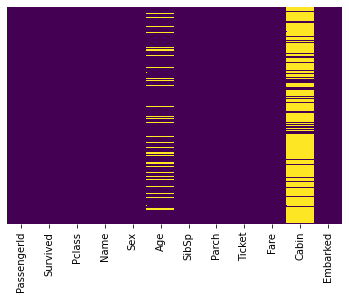

In [4]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

### Checking the Target Variable

<AxesSubplot:xlabel='Survived', ylabel='count'>

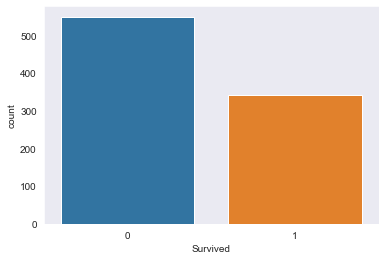

In [5]:
sns.set_style('dark')
sns.countplot(x = 'Survived', data = train)

### Target Variable (Survival) Based on Gender

<AxesSubplot:xlabel='Survived', ylabel='count'>

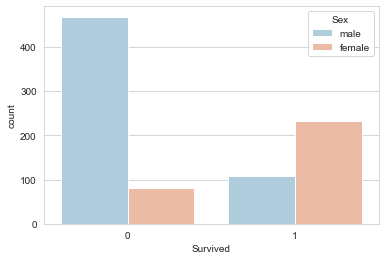

In [6]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Sex', data = train, palette = 'RdBu_r')

<br> Vast majority of men didn't survived as well
In the group of peoplw who survied, men are far less than woman

### Survival based on Class

<AxesSubplot:xlabel='Survived', ylabel='count'>

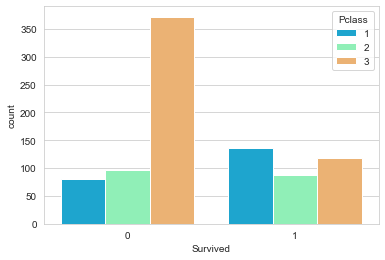

In [7]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Pclass', data = train, palette = 'rainbow' )

<br> Among the people who didn't survive, most of them where from class 3

### Distribution of Age

<AxesSubplot:xlabel='Age'>

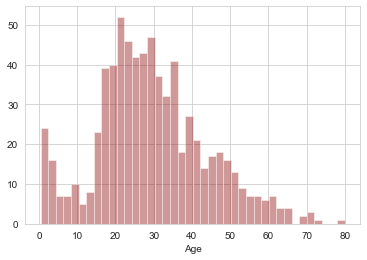

In [8]:
sns.distplot(train.Age.dropna(), kde = False, color = 'darkred', bins = 40)

<br> Maximum number of people are from age group 20 to 30,
Elderly people (above 60) are very less

### Count of People who either had Siblings or Spouse

<AxesSubplot:xlabel='SibSp', ylabel='count'>

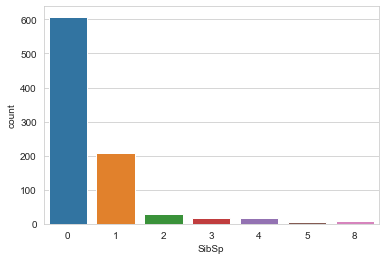

In [9]:
sns.countplot(x = 'SibSp', data = train)

<br> Maximum number of people didn't have a sibling or spouse.

### Average Fare

<AxesSubplot:>

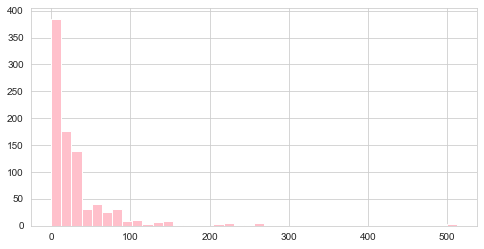

In [10]:
train['Fare'].hist(color = 'pink', bins = 40, figsize = (8,4))

### Data Cleaning

<br> We want to fill in the missing values in Age column by imputation for which we can use mean value. But let's try to take it one step further and use average age based on the class.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

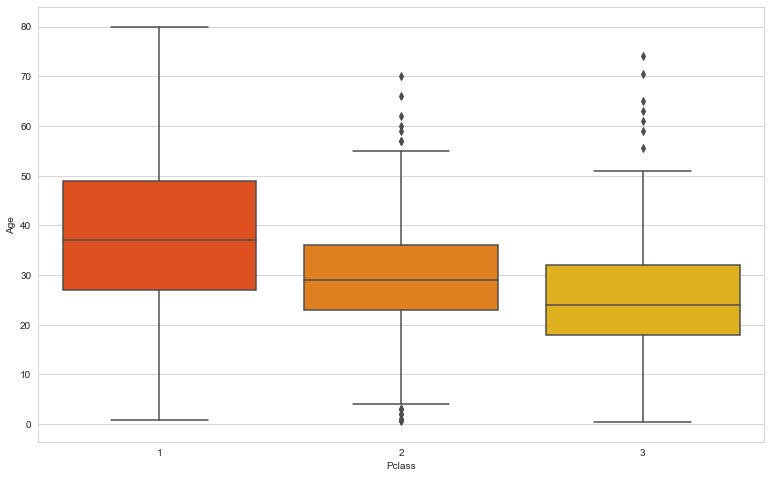

In [13]:
plt.figure(figsize = (13,8))
sns.boxplot(x = 'Pclass', y = 'Age', data = train, palette = 'autumn')

<br> We can see that average age of the passenger in wealthier classes is older. Which makes sense

In [14]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

<br> Applying the function

In [15]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis = 1)

<AxesSubplot:>

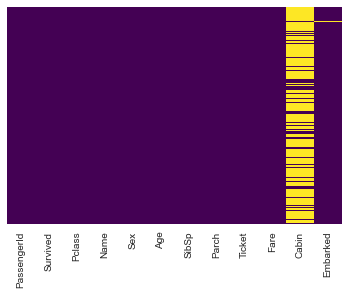

In [16]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

<br> Now as the Cabin feature has more than 95% Null values, let's drop it. Also let's drop the row which as Embarked as Null

In [17]:
train.drop('Cabin', axis = 1, inplace = True)

In [18]:
train.dropna(inplace = True)

### Converting Categorical Features

<br> We'll fist convert the categorical (Nominal Features) to dummy Variables for the ease during ML algorithm

In [19]:
pd.get_dummies(train['Embarked'], drop_first = True).head() # Dropping the first column as be represented by the combination of the other two (0,0)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [20]:
sex = pd.get_dummies(train['Sex'], drop_first = True)
embark = pd.get_dummies(train['Embarked'], drop_first = True)

<br> As name and ticket doesn't provide any value for analysis lets drop it with the columns from dummy variables

In [25]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace = True)

In [26]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [27]:
train = pd.concat([train, sex, embark], axis = 1)

In [28]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
